<a href="https://colab.research.google.com/github/Leeyeji13/KBDB---Team-Wine_quality/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/beneyoung/KBDB---Team-Wine_quality/main/Wine_quality/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/beneyoung/KBDB---Team-Wine_quality/main/Wine_quality/test.csv")
submission = pd.read_csv("https://raw.githubusercontent.com/beneyoung/KBDB---Team-Wine_quality/main/Wine_quality/sample_submission.csv")

In [3]:
print('< Train Data information >')
print(train.info())
print('=====================================================================================================')
print("< Train Data shape >")
print(train.shape)
print('=====================================================================================================')
print("< Train Data columns >")
print(train.columns)

< Train Data information >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory us

< 변수 설명 >
- index
- ***quality(품질) : 와인의 퀄리티를 나타낸다. (결과적으로 다른 변수들을 이용하여 예측하려고 하는 변수)*** 
- fixed acidity(고정 산도) : 와인의 산도를 제어한다.
- volatile acidity(휘발성 산도) : 와인의 향에 연관이 많다.
- citric acid(구연산) : 와인의 신선함을 유지시켜주는 역할을 하며, 산성화에 연관을 미친다.
- residual sugar(잔류 설탕) : 와인의 단맛을 올려준다.
- chlorides(염화물) : 와인의 짠맛과 신맛을 좌우하는 성분이다.
- free sulfur dioxide(자유 이산 화황) / total sulfur dioxide(총 이산 화황) / sulphates(황화합물) : 특정 박테리아와 효모를 죽여 와인의 보관도를 높여준다. 
- density(밀도) : 바디의 높고 낮음을 표현하는 와인의 바디감을 의미한다.
- pH(산성도) : 와인의 신맛의 정도를 나타낸다.
- alcohol(알코올) : 와인에 단맛을 주며 바디감에 영향을 준다. 
- type : white/red


In [4]:
train.drop(['index'], axis = 1, inplace = True) #쓸데없는 칼럼 제거
test.drop(['index'], axis = 1, inplace = True)
train.columns = [c.replace(' ','_') for c in train.columns] #칼럼명 정리
test.columns = [c.replace(' ','_') for c in test.columns]

In [5]:
train.isna().sum() #결측치 없음 확인

quality                 0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


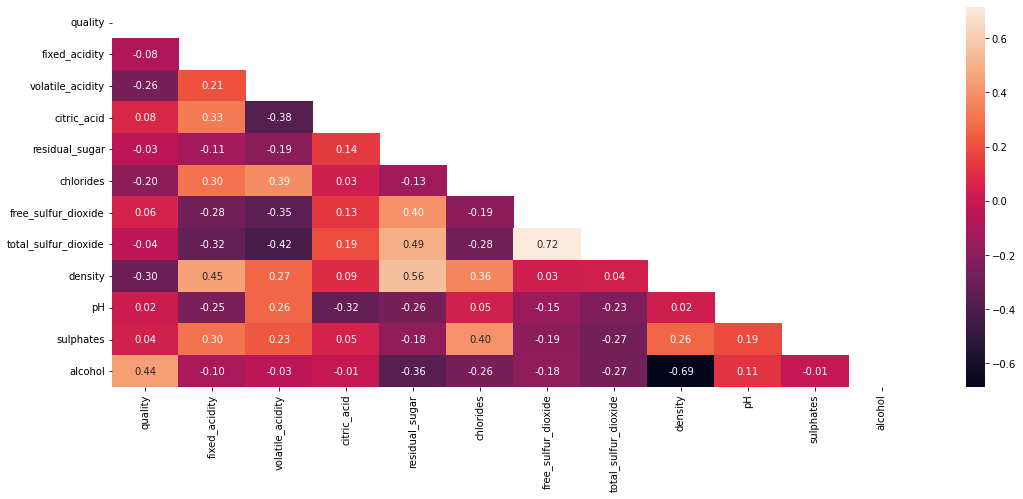

In [6]:
#상관계수 확인
plt.figure(figsize = (18, 7))
mask = np.triu(np.ones_like(train.corr(), dtype = np.bool))
sns.heatmap(train.corr(), annot = True, mask = mask, fmt = '0.2f')
plt.show()

- total_sulfur_dioxide / free_sulfur_dioxide : 0.72(+) -> 비슷한 성분으로 유의미한 통계 X
- density / residual_sugar : 0.56(+)
- alcohol / density : 0.69(-)
- total_sulfur_dioxide / residual_sugar : 0.49(+)
- density / fixed_acidity : 0.45(+)
- alcohol / quality : 0.44(+)
- total_sulfur_dioxide / volatile_acidity : 0.42(-)

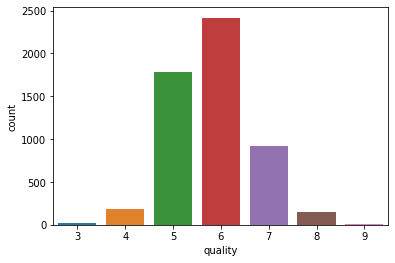

In [7]:
sns.countplot(x = 'quality', data = train)

In [8]:
target = 'quality'
features = train.columns.drop([target])

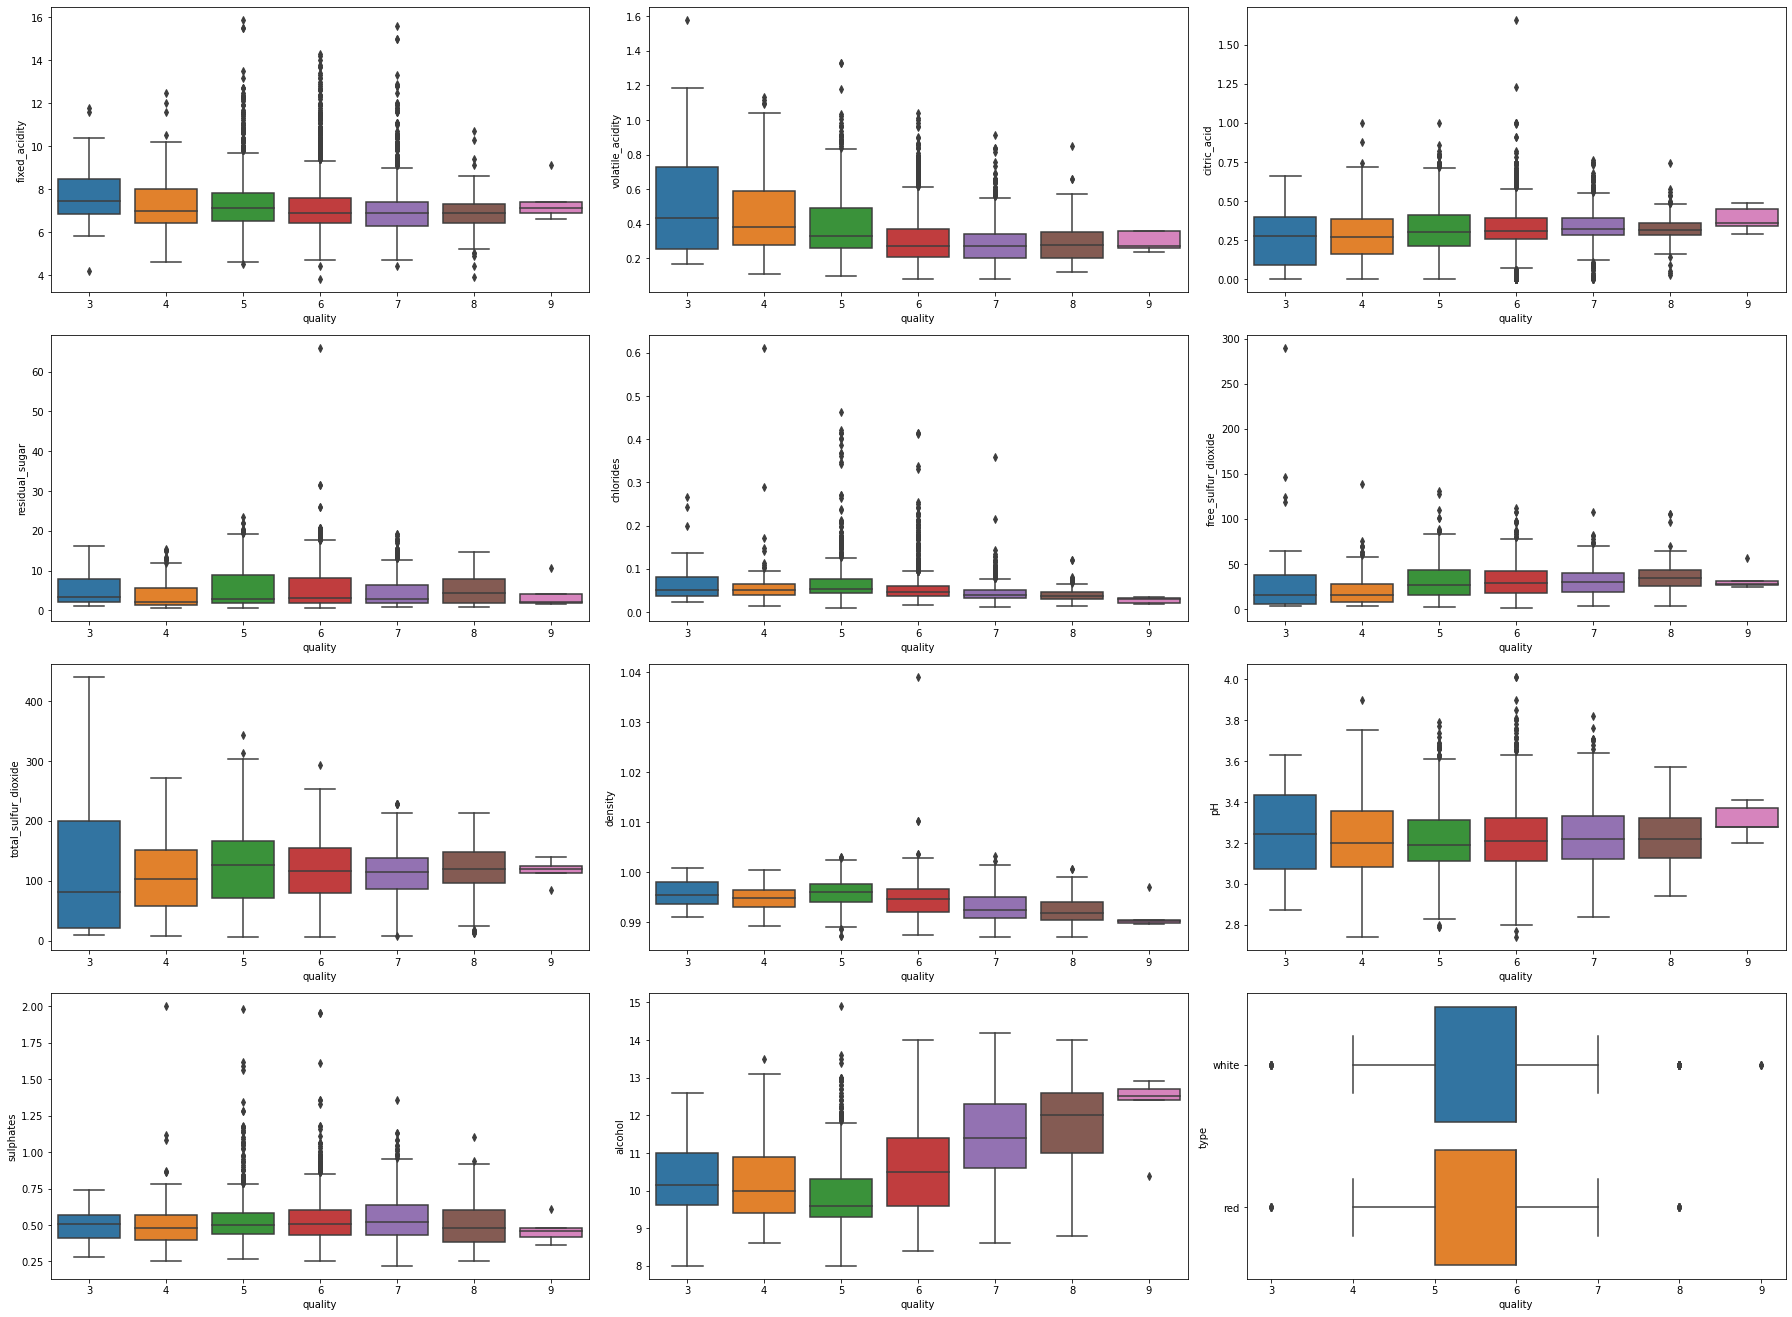

In [9]:
plt.figure(figsize = (25, 20))
for i in range(len(features)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x = target, y = features[i], data = train)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

In [10]:
train[target].value_counts(normalize = True)

6    0.439512
5    0.325268
7    0.168092
4    0.033837
8    0.027651
3    0.004730
9    0.000910
Name: quality, dtype: float64

Text(0.5, 1.0, 'quality')

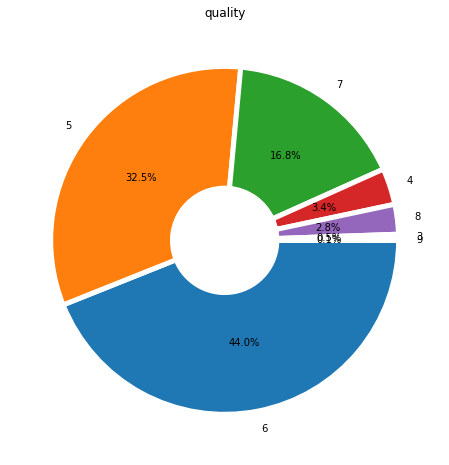

In [11]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
train[target].value_counts().plot(kind = "pie", autopct = '%1.1f%%', counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("quality")

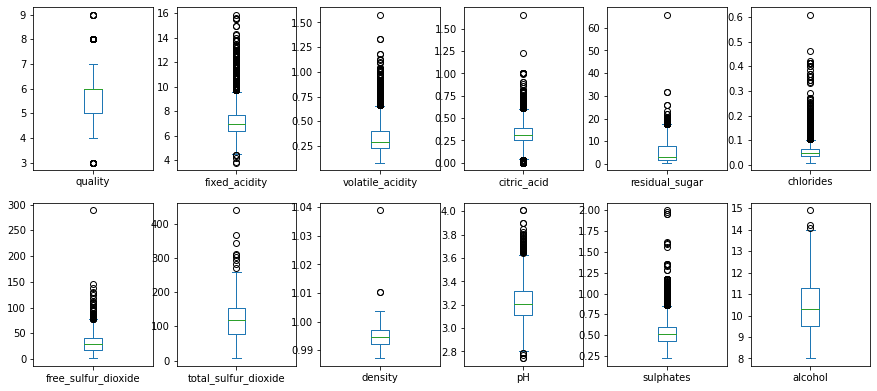

In [12]:
#이상치 확인
train.plot(kind = "box", subplots = True, layout = (6, 6), figsize = (15, 21))
plt.show()

In [13]:
train.describe()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [14]:
#데이터 라벨 인코딩
encoder = LabelEncoder()
train['type'] = encoder.fit_transform(train['type'])
test['type'] = encoder.fit_transform(test['type'])

In [15]:
#train/val
train, val = train_test_split(train, train_size = 0.80, test_size = 0.20, stratify = train[target], random_state = 2)

In [16]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [17]:
#데이터 스케일 조정 필요
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

1. Logistic Regression
2. RandomForests
3. XGBoost
4. Lgbm
5. Decision Tree
6. SVC

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
def run_model(model, X_train, y_train, X_val, y_val, verbose = True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_val)

    print(classification_report(y_val,y_pred,digits=5))
    print("==============================================================")
    print(" => 검증 정확도 : ", accuracy_score(y_val, y_pred) * 100)

In [20]:
params_xgb = {}
model_xgb = xgb.XGBClassifier(**params_xgb)
run_model(model_xgb, X_train_scaled, y_train, X_val_scaled, y_val)

              precision    recall  f1-score   support

           3    0.00000   0.00000   0.00000         5
           4    0.33333   0.05405   0.09302        37
           5    0.60563   0.60056   0.60309       358
           6    0.54361   0.72107   0.61989       484
           7    0.62105   0.31892   0.42143       185
           8    0.50000   0.03333   0.06250        30
           9    0.00000   0.00000   0.00000         1

    accuracy                        0.56909      1100
   macro avg    0.37195   0.24685   0.25713      1100
weighted avg    0.56559   0.56909   0.54474      1100

 => 검증 정확도 :  56.90909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
params_xgb = {'gamma': 0.013, 'max_depth': 9, 'subsample': 0.9, 'min_child_weight': 2}
model_xgb = xgb.XGBClassifier(**params_xgb)
run_model(model_xgb, X_train_scaled, y_train, X_val_scaled, y_val)

              precision    recall  f1-score   support

           3    0.50000   0.20000   0.28571         5
           4    0.50000   0.13514   0.21277        37
           5    0.70435   0.67877   0.69132       358
           6    0.63007   0.77066   0.69331       484
           7    0.68841   0.51351   0.58824       185
           8    0.76923   0.33333   0.46512        30
           9    0.00000   0.00000   0.00000         1

    accuracy                        0.66091      1100
   macro avg    0.54172   0.37592   0.41949      1100
weighted avg    0.66231   0.66091   0.65012      1100

 => 검증 정확도 :  66.0909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
